In [1]:
import numpy as np
np.random.seed(39)
import leoneed as ln
from matplotlib import pyplot as plt
plt.style.use("solarized-light")

息吹く炎、君の鼓動の中。


In [2]:
fc = ln.stage.Sequence([
    ln.needle.Mul_Matrix(( 3 , 4 ), initval=np.array([
        [ 1., 0.,  0.,  0. ],
        [ 0.,  .5,  .5, 0. ],
        [ 0., 0.,  0.,  1. ],
        ])),
    ln.needle.Add_Vector(4),
    ln.needle.Activation_Tanh(4),
    ])

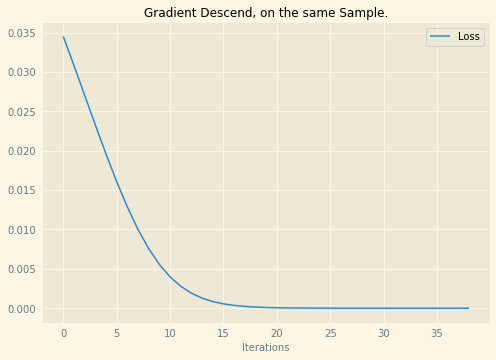

In [3]:
X = np.array([ 1., 0., -1. ]).reshape( 1 , 3 )
y = np.array([ .39, 0., 0., -.39 ]).reshape( 1 , 4 )
loss_history = []
for k in range(39):
    fc, current_loss = fc.fit_sample(X, y)
    loss_history.append(current_loss)
with plt.rc_context({}):
    plt.plot(loss_history, label="Loss")
    plt.legend()
    plt.xlabel("Iterations")
    plt.title("Gradient Descend, on the same Sample.")
    plt.savefig("./gradloss.jpeg")
    plt.show()

In [4]:
print(fc[0].tensor)

[[0.80399393 0.         0.         0.19600607]
 [0.         0.5        0.5        0.        ]
 [0.19600607 0.         0.         0.80399393]]
